# Final Project

## Step 1: Migration Data Download

In [1]:
# Import needed Python libraries
import time
import zipfile
from getpass import getpass
from glob import glob

import pygbif.occurrences as occ
import pygbif.species as species
import requests

# Python Standard Library Packages
import os
import pathlib

# Other Packages
import earthpy # Manage local data
import pandas as pd # Work with tabular data
import geopandas as gpd # Work with geospatial vector data
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Get month names
import calendar

# Libraries for Dynamic mapping
import cartopy.crs as ccrs
import hvplot.pandas
import panel as pn


In [2]:
# Create data directory
data_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
)

## Make the path
os.makedirs(data_dir, exist_ok=True)


## STEP 2: Register and log in to GBIF

In [3]:
####--------------------------####
#### DO NOT MODIFY THIS CODE! ####
####--------------------------####
# This code ASKS for your credentials 
# and saves it for the rest of the session.
# NEVER put your credentials into your code!!!!

# GBIF needs a username, password, and email 
# All 3 need to match the account
reset = True

# Request and store username
if (not ('GBIF_USER'  in os.environ)) or reset:
    os.environ['GBIF_USER'] = input('GBIF username:')

# Securely request and store password
if (not ('GBIF_PWD'  in os.environ)) or reset:
    os.environ['GBIF_PWD'] = getpass('GBIF password:')
    
# Request and store account email address
if (not ('GBIF_EMAIL'  in os.environ)) or reset:
    os.environ['GBIF_EMAIL'] = input('GBIF email:')

## STEP 3: Get the taxon key from GBIF

One of the tricky parts about getting occurrence data from GBIF is that
species often have multiple names in different contexts. Luckily, GBIF
also provides a Name Backbone service that will translate scientific and
colloquial names into unique identifiers. GBIF calls these identifiers
**taxon keys**. 



In [4]:
## Get the 2 distinct species key from GBIF 
backbone_ruby = species.name_backbone(name='Archilochus colubris')
backbone_broad = species.name_backbone(name='Selasphorus platycercus')
backbone_chin = species.name_backbone(name='Archilochus alexandris')

species_key_ruby = backbone_ruby['usageKey']
species_key_broad = backbone_broad['usageKey']
species_key_chin = backbone_chin['usageKey']

# Retrieve usage key and confirm existence
print("The usage key for Ruby is: " , species_key_ruby)
print("The usage key for Broad-Tail is: ", species_key_broad)
print("The usage key for Black-Chin is: ", species_key_chin)

The usage key for Ruby is:  5228514
The usage key for Broad-Tail is:  2476844
The usage key for Black-Chin is:  5228513


## STEP 4: Download data from GBIF

Downloading GBIF data is a multi-step process. 

For this final project, we will be using two different species of hummingbird, so will need to run this information twice.

In [5]:
# Create data directory
ruby_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
    'ruby'
)

## Make the path
os.makedirs(ruby_dir, exist_ok=True)

In [6]:
# Only download once
gbif_pattern_ruby = os.path.join(ruby_dir, '*.csv')

if not glob(gbif_pattern_ruby):
    
    # Only submit one request
    if not 'GBIF_DOWNLOAD_KEY' in os.environ:
        # Submit query to GBIF
        gbif_query = occ.download([
            f"taxonKey = {species_key_ruby}",
            "hasCoordinate = True",
            f"year = 2024",
        ])
        # Take first result
        os.environ['GBIF_DOWNLOAD_KEY'] = gbif_query[0]

    # Wait for the download to build
    dld_key = os.environ['GBIF_DOWNLOAD_KEY']

    # use the occurrence command module in pygbif to get the metadata
    wait = occ.download_meta(dld_key)['status']

    # check if the status of the download = "SUCCEEDED"
    # wait and loop through until it finishes
    while not wait=='SUCCEEDED':
        wait = occ.download_meta(dld_key)['status']
        time.sleep(5)

    # Download GBIF data
    dld_info = occ.download_get(
        os.environ['GBIF_DOWNLOAD_KEY'], 
        path=ruby_dir)
    dld_path = dld_info['path']

    # Unzip GBIF data
    with zipfile.ZipFile(dld_path) as dld_zip:
        dld_zip.extractall(path=ruby_dir)
        
    # Clean up the .zip file
    os.remove(dld_path)

    

else: print("Done!") # If file already exists in folder    

# Find the extracted .csv file path (first result)
gbif_path_ruby = glob(gbif_pattern_ruby)[0]

#Rename the file to a descriptive name
csv_filename = os.path.basename(gbif_path_ruby)

ruby_gbif = "ruby-gbif.csv"
new_path1 = os.path.join(ruby_dir, ruby_gbif)

os.rename(gbif_path_ruby, new_path1)

print(f"Renamed {csv_filename} → {ruby_gbif}")

Done!
Renamed ruby-gbif.csv → ruby-gbif.csv


In [7]:
# Create data directory
broad_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
    'broad'
)

## Make the path
os.makedirs(broad_dir, exist_ok=True)

In [8]:
# Only download once
gbif_pattern_broad = os.path.join(broad_dir, '*.csv')

if not glob(gbif_pattern_broad):
    
    # Only submit one request
    if not 'GBIF_DOWNLOAD_KEY_1' in os.environ:
        # Submit query to GBIF
        gbif_query = occ.download([
            f"taxonKey = {species_key_broad}",
            "hasCoordinate = True",
            f"year = 2024",
        ])
        # Take first result
        os.environ['GBIF_DOWNLOAD_KEY_1'] = gbif_query[0]

    # Wait for the download to build
    dld_key = os.environ['GBIF_DOWNLOAD_KEY_1']

    # use the occurrence command module in pygbif to get the metadata
    wait = occ.download_meta(dld_key)['status']

    # check if the status of the download = "SUCCEEDED"
    # wait and loop through until it finishes
    while not wait=='SUCCEEDED':
        wait = occ.download_meta(dld_key)['status']
        time.sleep(5)

    # Download GBIF data
    dld_info = occ.download_get(
        os.environ['GBIF_DOWNLOAD_KEY_1'], 
        path=data_dir)
    dld_path = dld_info['path']

    # Unzip GBIF data
    with zipfile.ZipFile(dld_path) as dld_zip:
        dld_zip.extractall(path=broad_dir)
        
    # Clean up the .zip file
    os.remove(dld_path)

    

else: print("Done!") # If file already exists in folder    

# Find the extracted .csv file path (first result)
gbif_path_broad = glob(gbif_pattern_broad)[0]

#Rename the file to a descriptive name
csv_filename = os.path.basename(gbif_path_broad)

broad_gbif = "broad-gbif.csv"
new_path2 = os.path.join(broad_dir, broad_gbif)

os.rename(gbif_path_broad, new_path2)

print(f"Renamed {csv_filename} → {broad_gbif}")

Done!
Renamed broad-gbif.csv → broad-gbif.csv


## Step 5: Define Study Area: Ecoregions of North America and import GBIF data

In this section:
- Collect the directy for the ecoregion of North America and ensure it is plotting correctly
- Load the collected GBIF data into the notebook as a dataframe
- Change the data from a data frame (DF) to a geodatafram (GDF)

In [9]:
### Get url for ecoregions
eco_url = ("https://storage.googleapis.com/"
       "teow2016/Ecoregions2017.zip")

### Make them machine readable
eco_dir = os.path.join(data_dir, "ecoregions")

### Make the ecoregions directory
os.makedirs(eco_dir, exist_ok = True)

### Join ecoregions shapefile path
eco_path = os.path.join(eco_dir, "ecoregions.shp")

### Download the data (once)
if not os.path.exists(eco_path):
    eco_gdf = gpd.read_file(eco_url)
    eco_gdf.to_file(eco_path)

<Axes: >

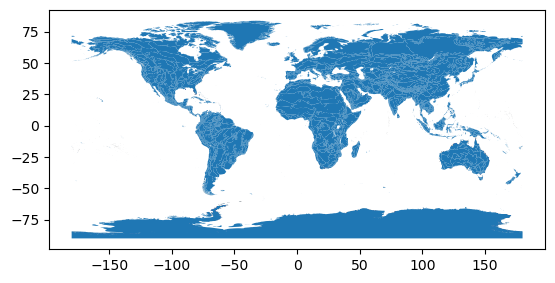

In [10]:
# Open up the ecoregions boundaries
eco_gdf = (
    gpd.read_file(eco_path)
    [['OBJECTID', 'ECO_NAME', 'SHAPE_AREA', 'geometry' ]]
   
)
    
# Plot the ecoregions quickly to check download
eco_gdf.plot()

In [11]:
#View the data
eco_gdf.head()

,OBJECTID,ECO_NAME,SHAPE_AREA,geometry
0,1.0,Adelie Land tundra,0.038948,"MULTIPOLYGON (((158.7141 -69.60657, 158.71264 ..."
1,2.0,Admiralty Islands lowland rain forests,0.170599,"MULTIPOLYGON (((147.28819 -2.57589, 147.2715 -..."
2,3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35..."
3,4.0,Afghan Mountains semi-desert,1.355536,"MULTIPOLYGON (((65.48655 34.71401, 65.52872 34..."
4,5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673..."


In [12]:
# Check that files were extracted into the correct directory
print("Files in directory after extraction:", os.listdir(data_dir))
print("Ruby folder:", os.listdir(ruby_dir))
print("Broad folder:", os.listdir(broad_dir))

Files in directory after extraction: ['ruby', 'ecoregions', 'broad']
Ruby folder: ['ruby-gbif.csv']
Broad folder: ['broad-gbif.csv']


## Step 6: Load GBIF dataframe and turn into geodataframes

In [13]:
# Load the GBIF dataframe
gbif_ruby_df = pd.read_csv(
    new_path1,
    delimiter = '\t',
    index_col='gbifID',
    usecols = ['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])

### Check out data
gbif_ruby_df.head()

,decimalLatitude,decimalLongitude,month
gbifID,,,
4948005334,41.315200,-72.920300,9.0
5159684301,41.303649,-72.927627,9.0
4950101970,39.365147,-86.508346,9.0
4910889783,41.400784,-81.887628,5.0
4867924503,20.501114,-86.944814,4.0


In [14]:
# Load the GBIF dataframe


gbif_broad_df = pd.read_csv(
    new_path2,
    delimiter = '\t',
    index_col='gbifID',
    usecols = ['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])

### Check out data
gbif_broad_df.head()

,decimalLatitude,decimalLongitude,month
gbifID,,,
5196098037,39.747056,-105.227654,10
5196098277,39.581335,-104.978674,8
5196115619,39.836765,-105.090057,6
5196115622,39.577505,-105.303160,6
5196115680,40.357246,-105.549468,5


In [15]:
## Convert GBIF data to GDF
gbif_ruby_gdf = (
    gpd.GeoDataFrame(
        gbif_ruby_df, 
        geometry=gpd.points_from_xy(
            gbif_ruby_df.decimalLongitude, 
            gbif_ruby_df.decimalLatitude), 
        crs="EPSG:4326") #Using latitude and longitude in degrees
    # Select the desired columns
    [['month', 'geometry']]
)

# View the data
gbif_ruby_gdf

,month,geometry
gbifID,,
4948005334,9.0,POINT (-72.9203 41.3152)
5159684301,9.0,POINT (-72.92763 41.30365)
4950101970,9.0,POINT (-86.50835 39.36515)
4910889783,5.0,POINT (-81.88763 41.40078)
4867924503,4.0,POINT (-86.94481 20.50111)
...,...,...
5288307497,11.0,POINT (-104.81715 19.30815)
4882314484,5.0,POINT (-82.50931 41.91015)
4882844007,5.0,POINT (-82.51074 41.91552)


In [16]:
## Convert GBIF data to GDF
gbif_broad_gdf = (
    gpd.GeoDataFrame(
        gbif_broad_df, 
        geometry=gpd.points_from_xy(
            gbif_broad_df.decimalLongitude, 
            gbif_broad_df.decimalLatitude), 
        crs="EPSG:4326") #Using latitude and longitude in degrees
    # Select the desired columns
    [['month', 'geometry']]
)

# View the data
gbif_broad_gdf

,month,geometry
gbifID,,
5196098037,10,POINT (-105.22765 39.74706)
5196098277,8,POINT (-104.97867 39.58134)
5196115619,6,POINT (-105.09006 39.83676)
5196115622,6,POINT (-105.30316 39.5775)
5196115680,5,POINT (-105.54947 40.35725)
...,...,...
4907350423,7,POINT (-110.7147 32.4104)
4907345064,7,POINT (-110.7147 32.4104)
4605963377,2,POINT (-92.0825 15.156)


In [17]:
# Confirm the data is a Geo Data Frame
gbif_ruby_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 457548 entries, 4948005334 to 5151716362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   month     457547 non-null  float64 
 1   geometry  457548 non-null  geometry
dtypes: float64(1), geometry(1)
memory usage: 10.5 MB


In [18]:
# Confirm the data is a Geo Data Frame
gbif_broad_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 82390 entries, 5196098037 to 4940937149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   month     82390 non-null  int64   
 1   geometry  82390 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 1.9 MB


## Step 7: Consolidate dataframe data into ecoregion data

EPSG:4326
Ruby EPSG:4326
            month                     geometry
gbifID                                        
4948005334    9.0     POINT (-72.9203 41.3152)
5159684301    9.0   POINT (-72.92763 41.30365)
4950101970    9.0   POINT (-86.50835 39.36515)
4910889783    5.0   POINT (-81.88763 41.40078)
4867924503    4.0   POINT (-86.94481 20.50111)
...           ...                          ...
5288307497   11.0  POINT (-104.81715 19.30815)
4882314484    5.0   POINT (-82.50931 41.91015)
4882844007    5.0   POINT (-82.51074 41.91552)
4605963338    2.0     POINT (-91.2229 14.5778)
5151716362   11.0     POINT (-96.6619 17.1248)

[457548 rows x 2 columns]
Broad tailed EPSG:4326
            month                     geometry
gbifID                                        
5196098037     10  POINT (-105.22765 39.74706)
5196098277      8  POINT (-104.97867 39.58134)
5196115619      6  POINT (-105.09006 39.83676)
5196115622      6   POINT (-105.30316 39.5775)
5196115680      5  POINT (-105.5

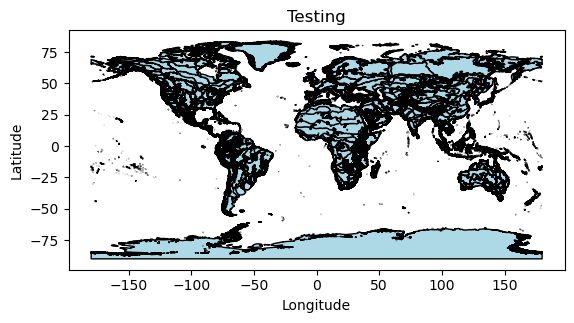

In [19]:
# Find out what CRS the data are in
print(eco_gdf.crs)

# Plot
eco_gdf.plot(
    color = "lightblue",
    edgecolor = "black"
)

# Give it labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Testing")

print("Ruby" , gbif_ruby_gdf.crs)

print(gbif_ruby_gdf)

print("Broad tailed" , gbif_broad_gdf.crs)

print(gbif_broad_gdf)

print(eco_gdf)

In [20]:
gbif_eco_ruby_gdf = (
    eco_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_ruby_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_ruby_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about
    [['OBJECTID', 'month']]
    .rename(columns = {'OBJECTID': 'eco-region'})
)
gbif_eco_ruby_gdf

,eco-region,month
12,13.0,7.0
12,13.0,7.0
12,13.0,7.0
12,13.0,7.0
12,13.0,6.0
...,...,...
827,833.0,10.0
833,839.0,6.0
833,839.0,6.0
833,839.0,7.0


In [21]:
gbif_eco_broad_gdf = (
    eco_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_broad_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_broad_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about
    [['OBJECTID', 'month']]
    .rename(columns = {'OBJECTID': 'eco-region'})
)
gbif_eco_broad_gdf

,eco-region,month
43,44.0,4
43,44.0,9
43,44.0,4
43,44.0,4
43,44.0,4
...,...,...
796,802.0,6
796,802.0,7
796,802.0,5
796,802.0,8


In [22]:
gbif_eco_ruby_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450639 entries, 12 to 833
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   eco-region  450639 non-null  float64
 1   month       450639 non-null  float64
dtypes: float64(2)
memory usage: 10.3 MB


In [23]:
gbif_eco_broad_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82388 entries, 43 to 833
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   eco-region  82388 non-null  float64
 1   month       82388 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


## Step 8: Normalize hummingbird occurrences data

In [24]:
occurrence_ruby_df = (
    gbif_eco_ruby_gdf

    # Ecoregions by month
    .groupby(['eco-region', 'month'])

    # Count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)

# Get rid of rare observations 
occurrence_ruby_df = occurrence_ruby_df[occurrence_ruby_df.occurrences > 1] # Only include occurences wiht more than one recorded

# Take the mean by ecoregion
mean_occurrences_ruby_by_ecoregion = (
    occurrence_ruby_df
    .groupby('eco-region')
    .mean()
)
mean_occurrences_ruby_by_ecoregion

# Take the mean by month
mean_occurrences_ruby_by_month = (
    occurrence_ruby_df
    .groupby('month')
    .mean()
)
mean_occurrences_ruby_by_month

### summarize occurrences
occurrence_ruby_df = (
    gbif_eco_ruby_gdf
    # # Select only necessary columns
    # [[]]
    # For each ecoregion, for each month...
    .groupby(['eco-region', 'month'])
    # ...count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)
print(mean_occurrences_ruby_by_ecoregion)

print(mean_occurrences_ruby_by_month)

            occurrences
eco-region             
13.0           4.000000
17.0        1195.142857
33.0        2907.200000
34.0        1338.250000
35.0        2622.818182
...                 ...
796.0         53.000000
809.0         47.500000
810.0         32.250000
833.0          2.000000
839.0          2.000000

[90 rows x 1 columns]
       occurrences
month             
1.0     130.333333
2.0     100.050000
3.0     119.352941
4.0     507.250000
5.0    1849.300000
6.0    1433.842105
7.0    1496.682927
8.0    1822.764706
9.0    1193.073529
10.0    230.873016
11.0    117.617021
12.0    106.804348


In [25]:
occurrence_broad_df = (
    gbif_eco_broad_gdf

    # Ecoregions by month
    .groupby(['eco-region', 'month'])

    # Count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)

# Get rid of rare observations 
occurrence_broad_df = occurrence_broad_df[occurrence_broad_df.occurrences > 1] # Only include occurences wiht more than one recorded

# Take the mean by ecoregion
mean_occurrences_broad_by_ecoregion = (
    occurrence_broad_df
    .groupby('eco-region')
    .mean()
)
mean_occurrences_broad_by_ecoregion

# Take the mean by month
mean_occurrences_broad_by_month = (
    occurrence_broad_df
    .groupby('month')
    .mean()
)
mean_occurrences_broad_by_month

### summarize occurrences
occurrence_broad_df = (
    gbif_eco_broad_gdf
    # # Select only necessary columns
    # [[]]
    # For each ecoregion, for each month...
    .groupby(['eco-region', 'month'])
    # ...count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)
print(mean_occurrences_broad_by_ecoregion)

print(mean_occurrences_broad_by_month)

            occurrences
eco-region             
44.0         664.818182
61.0           4.333333
63.0           3.333333
74.0           4.000000
121.0         23.333333
122.0         12.333333
126.0         11.000000
143.0          7.000000
164.0        649.833333
174.0        660.333333
175.0       2956.900000
191.0          8.000000
215.0          5.000000
246.0         15.000000
282.0         51.666667
283.0        254.666667
349.0          3.666667
435.0          4.500000
446.0         26.500000
449.0         47.625000
451.0         33.600000
518.0         15.571429
537.0          7.500000
569.0         12.000000
572.0          3.800000
628.0          5.000000
629.0         17.666667
630.0         17.200000
631.0        375.916667
632.0         63.454545
633.0          8.000000
635.0          3.250000
637.0         97.000000
644.0         32.750000
648.0        395.200000
666.0          3.000000
686.0          4.500000
725.0          4.000000
726.0          8.800000
732.0          3

In [26]:
# Normalize by space and time for sampling effort
occurrence_ruby_df['norm_occurrences'] = (
    occurrence_ruby_df
    / mean_occurrences_ruby_by_month # Divide by monthly occurrences
    / mean_occurrences_ruby_by_ecoregion # Divide by ecoregion occurrences
)
occurrence_ruby_df

occurrences  norm_occurrences
eco-region month                               
13.0       6.0              1          0.000174
           7.0              4          0.000668
17.0       4.0             82          0.000135
           5.0           2038          0.000922
           6.0           1858          0.001084
...                       ...               ...
833.0      3.0              1          0.004189
           10.0             2          0.004331
839.0      6.0              2          0.000697
           7.0              1          0.000334
           8.0              1          0.000274

[648 rows x 2 columns]

In [27]:
# Normalize by space and time for sampling effort
occurrence_broad_df['norm_occurrences'] = (
    occurrence_broad_df
    / mean_occurrences_broad_by_month # Divide by monthly occurrences
    / mean_occurrences_broad_by_ecoregion # Divide by ecoregion occurrences
)
occurrence_broad_df

occurrences  norm_occurrences
eco-region month                               
44.0       1                4          0.000449
           2                3          0.000280
           3               44          0.002359
           4              938          0.005399
           5             1706          0.003178
...                       ...               ...
802.0      6              112          0.002374
           7               92          0.002038
           8               87          0.002021
           9               15          0.000855
839.0      7                1               NaN

[289 rows x 2 columns]

<Axes: xlabel='month', ylabel='norm_occurrences'>

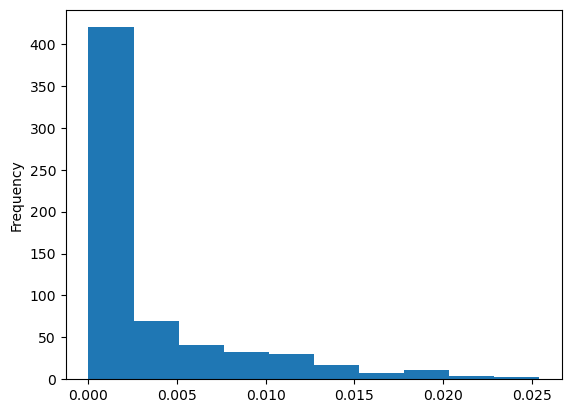

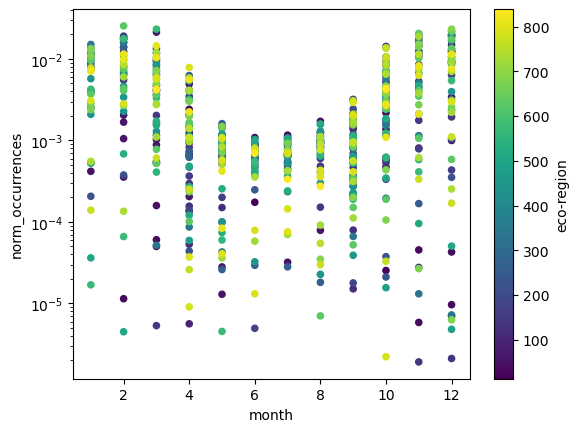

In [28]:
## Look at the data

# Histogram
occurrence_ruby_df.norm_occurrences.plot.hist()

# Scatterplot
occurrence_ruby_df.reset_index().plot.scatter(
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region',
    logy = True
)

<Axes: xlabel='month', ylabel='norm_occurrences'>

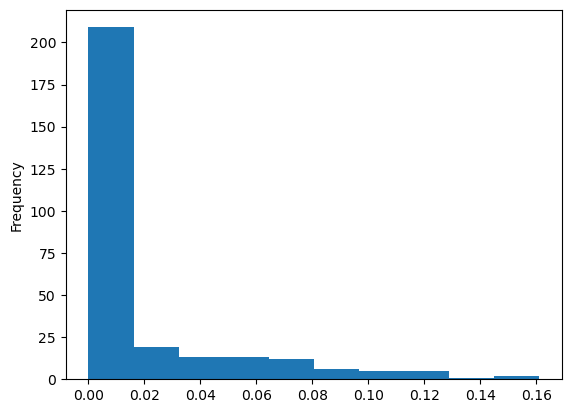

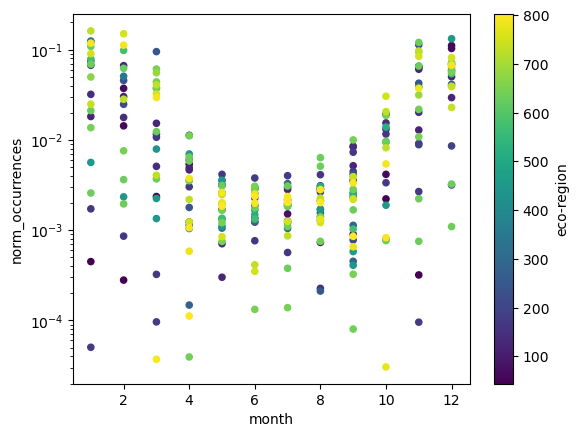

In [29]:
## Look at the data

# Histogram
occurrence_broad_df.norm_occurrences.plot.hist()

# Scatterplot
occurrence_broad_df.reset_index().plot.scatter(
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region',
    logy = True
)

## Step 9: Make side by side visuals of occurrences

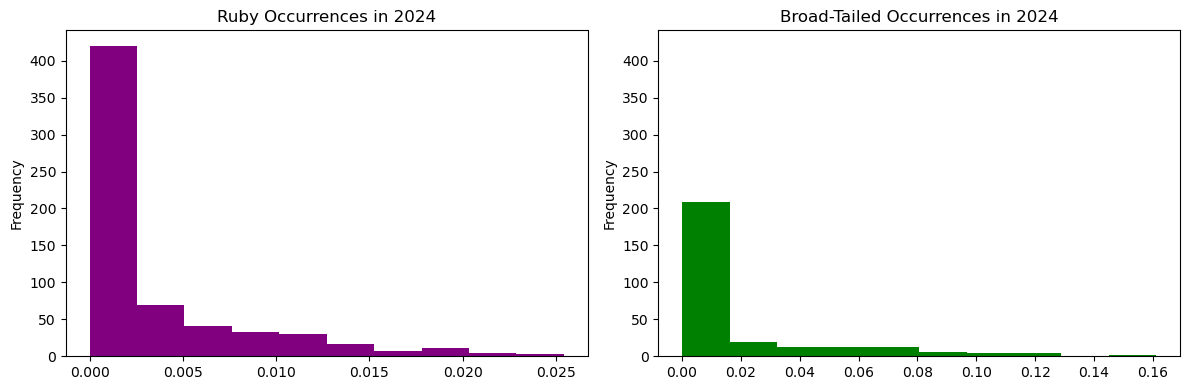

In [30]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4)) # 1 column and 2 rows

# Plot each in their own axes
occurrence_ruby_df.norm_occurrences.plot.hist(ax=axes[0], color ="purple").set_title("Ruby Occurrences in 2024")

occurrence_broad_df.norm_occurrences.plot.hist(ax=axes[1], color = "green").set_title("Broad-Tailed Occurrences in 2024"), 

ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1516/1244533586.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim(0, ymax)


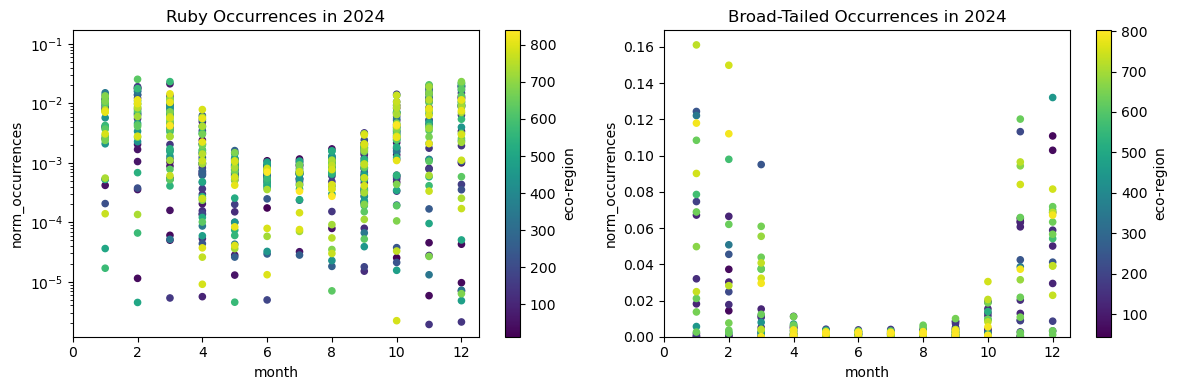

In [31]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4)) # 1 column and 2 rows


# Scatterplot
occurrence_ruby_df.reset_index().plot.scatter(ax=axes[0],
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region',
    logy = True
).set_title("Ruby Occurrences in 2024")
# Scatterplot
occurrence_broad_df.reset_index().plot.scatter(ax=axes[1],
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region').set_title("Broad-Tailed Occurrences in 2024")

ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

xmax = max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])
axes[0].set_xlim(0, xmax)
axes[1].set_xlim(0, xmax)

plt.tight_layout()
plt.show()

In [32]:
# Simplify the geometry to speed up processing
eco_gdf.geometry = eco_gdf.simplify(0.1, preserve_topology=False)


# Change the CRS to Mercator for mapping
eco_gdf = eco_gdf.to_crs(ccrs.Mercator())

# Check that the plot runs in a reasonable amount of time
eco_gdf.hvplot(geo=True, crs=ccrs.Mercator())

:Polygons   [Longitude,Latitude]

In [33]:
## Rename eco_gdf to match occurrence_df
eco_gdf = eco_gdf.rename(columns = {'OBJECTID' : 'eco-region'})

## Merge ecoregio index
eco_gdf = eco_gdf.set_index('eco-region')
eco_gdf

,ECO_NAME,SHAPE_AREA,geometry
eco-region,,,
1.0,Adelie Land tundra,0.038948,MULTIPOLYGON EMPTY
2.0,Admiralty Islands lowland rain forests,0.170599,"POLYGON ((16411777.375 -229101.376, 16384825.7..."
3.0,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((3391149.749 4336064.109, 33846..."
4.0,Afghan Mountains semi-desert,1.355536,"MULTIPOLYGON (((7369001.698 4093509.259, 73168..."
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-17930832.005 8046779.358, -17..."
...,...,...,...
848.0,Sulawesi lowland rain forests,9.422097,"MULTIPOLYGON (((14113374.546 501721.962, 14128..."
212.0,East African montane forests,5.010930,"MULTIPOLYGON (((4298787.669 -137583.786, 42727..."
224.0,Eastern Arc forests,0.890325,"MULTIPOLYGON (((4267432.68 -493759.165, 428533..."


In [34]:


# Join the occurrences with the plotting GeoDataFrame
occurrence_ruby_gdf = eco_gdf.join(occurrence_ruby_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_ruby_gdf.total_bounds

# Calendar Name slider
month_widget = pn.widgets.DiscreteSlider(
    options={
        calendar.month_name[month_num]: month_num
        for month_num in range(1, 12)
        }
)




In [35]:
occurrence_ruby_df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 648 entries, (np.float64(13.0), np.float64(6.0)) to (np.float64(839.0), np.float64(8.0))
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   occurrences       648 non-null    int64  
 1   norm_occurrences  636 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.4 KB


## Step 10: Make some maps of the data!

In [36]:
# Plot occurrence by ecoregion and month
migration_ruby_plot = (
    occurrence_ruby_gdf
    .hvplot(
      
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Ruby Throated Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom' # location of slider
    )
)

# Save the plot
migration_ruby_plot.save('migration-ruby-final.html', embed=True)

migration_ruby_plot.show()

INFO:Starting Bokeh server version 3.8.0 (running on Tornado 6.5.2)
INFO:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:43255


In [37]:
# Join the occurrences with the plotting GeoDataFrame
occurrence_broad_gdf = eco_gdf.join(occurrence_broad_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_broad_gdf.total_bounds

# Calendar Name slider
month_widget = pn.widgets.DiscreteSlider(
    options={
        calendar.month_name[month_num]: month_num
        for month_num in range(1, 12)
        }
)

# Plot occurrence by ecoregion and month
migration_broad_plot = (
    occurrence_broad_gdf
    .hvplot(
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Broad-Tailed Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom', # location of slider,
    )
)

# Save the plot
migration_broad_plot.save('migration-broad-final.html', embed=True)

migration_broad_plot.show()

INFO:Starting Bokeh server version 3.8.0 (running on Tornado 6.5.2)
INFO:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:33859


In [38]:
# Plot occurrence by ecoregion and month


migration_ruby_broad_plot = (
    
    occurrence_ruby_gdf
    .hvplot(
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Broad-Tailed Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom', # location of slider,
    )

    
)

# Save the plot
#migration_ruby_broad_plot.save('migration-ruby-broad-final.html', embed=True)

migration_ruby_broad_plot.show()

INFO:Starting Bokeh server version 3.8.0 (running on Tornado 6.5.2)
INFO:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:36647


In [39]:
ruby_hv = migration_ruby_plot[0].object
broad_hv = migration_broad_plot[0].object


In [40]:
combined = ruby_hv * broad_hv



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
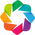

BokehModel(combine_events=True, render_bundle={'docs_json': {'a7953121-263a-40e0-b3a6-3c0c056a2d6b': {'version…

In [41]:
import holoviews as hv
hv.extension('bokeh')

month_dim = ruby_hv.kdims[0]  # usually 'month'

combined_dm = hv.DynamicMap(
    lambda month: (ruby_hv[month]*
                   broad_hv[month]
                  ).opts(
                      title='Ruby vs Broad-Tailed Occurrences in 2024',
                      width=800,
                      height=600
                  ),
    kdims=[month_dim]
)

combined_dm



In [45]:
hv.save(combined_dm, "ruby_vs_broad_interactive.html")

  0%|          | 0/12 [00:00<?, ?it/s]

In [47]:
ruby_hv.type

holoviews.core.overlay.Overlay

In [42]:
import rioxarray as rxr # To work with raster data
import xarray as xr # To work with data arrays and raster data

## Conclusion